<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Given the current per-pupil spending in California, this analysis will look at whether:
1. Students are achieving satisfactory educational outcomes, and
2. The current budget is related to improvements in educational outcomes.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

While SAT and ACT tests are no longer mandatory for admissions in many post-secondary institutions, these tests can still be helpful with assessing general readiness and potential success in a post-secondary career and education. Looking at SAT and ACT outcomes by county in California, 

<br> Spending on K-12 public education in California is going to approach $128 billion this fiscal year (2023-24). This is more than the education budget across all states, with the exception of New York and Texas. Despite this level of spending, California may yet be concerned about the educational outcomes of its public school system; with about 75 percent of California students lacking proficiency in core subject areas based on federal education standards.([*source*](https://www.hoover.org/research/despite-128-billion-budget-californias-k-12-education-system-continues-fail-grand-scale))

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`Expenditure_by_county.csv`](.data/Expenditure_by_county.csv): Education spending by county
* [`Education_spending_total_spending_by_LEA_by_county.csv`](.data/Education_spending_total_spending_by_LEA_by_county): Education spending by county by education level

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
def manual_mean(numbers):
    sum_num = 0
    length = 0
    
    for value in numbers:
        sum_num += value
        length += 1
    
    mean = sum_num / length
    
    return mean

manual_mean([1,2,3,4,5])

3.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [4]:
def manual_deviation(numbers):
    mean = manual_mean(numbers)
    
    diff_sum = 0
    
    for number in numbers:
        diff_sum += (number - mean) ** 2
    
    return (diff_sum/len(numbers))*0.5

manual_deviation([1,2,3,4,5])

1.0

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [9]:
def convert_percent(percent):
    value = float(percent[:-1])/100

    return value

In [12]:
convert_percent("30.5%") #testing on sample value

0.305

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [1219]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

## Dataset 1: 2019 ACT Scores in California by School

In [993]:
ACT19_California = pd.read_csv("../data/act_2019_ca.csv")
ACT19_California.columns = ACT19_California.columns.str.lower()

In [902]:
ACT19_California.isna().sum() #how many NANs are there --> looks like the entire Unnamed column needs to be removed
#ACT19_California.drop(columns='unnamed: 17', inplace = True) #--> remove column with header <unnamed: 17>

cds             1
ccode           1
cdcode          1
scode         523
rtype           1
sname         581
dname          59
cname           1
enroll12        1
numtsttakr      1
avgscrread    357
avgscreng     357
avgscrmath    357
avgscrsci     357
numge21       357
pctge21       357
year            1
dtype: int64

In [997]:
ACT19_California.dropna(subset = ["pctge21"], inplace=True) #drop rows where pct of students who achieved a score > 21 was missing (NaN)
ACT19_California_no_na.head()

,cds,ccode,cdcode,scode,rtype,sname,dname,cname,enroll12,numtsttakr,avgscrread,avgscreng,avgscrmath,avgscrsci,numge21,pctge21,year
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19
5,1.976968e+13,19.0,1976968.0,109926.0,S,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65.0,33.0,15,15,17,16,3,9.09,2018-19
6,1.964733e+13,19.0,1964733.0,126615.0,S,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126.0,16.0,18,18,18,17,5,31.25,2018-19
7,1.964246e+13,19.0,1964246.0,126003.0,S,Academies of the Antelope Valley,Antelope Valley Union High,Los Angeles,14.0,1.0,*,*,*,*,*,*,2018-19


### Analyzing ACT outcomes by county in California (2019)

**Step 1:** Calculating % of enrolled grade 12 students who took the ACT test in 2018-19

In [908]:
ACT19_California["act_participation_rate"]=ACT19_California["numtsttakr"]/ACT19_California["enroll12"]

**Step 2:** Aggregate enrollment and ACT test participation by county

In [909]:
ACT19_California_no_na_ca_county = ACT19_California[ACT19_California["enroll12"] != 0].groupby("cname").agg(
    {"enroll12": ["sum", "mean"], "numtsttakr": ["sum","mean"], "act_participation_rate": ["mean"]})
# group total and average enrollment and number of test takers by county (including enrollment rate)

In [911]:
State_ACT_19_value = ACT19_California_no_na_ca_county.loc[["State of California"],"act_participation_rate"]
State_mean_act = State_ACT_19_value.loc["State of California","mean"]
State_mean_act

0.1688307975084244

**Step 3:** Compare participation by county to State participation:

In [936]:
ACT19_California_no_na_ca_county["Compare_ACT"] = ACT19_California_no_na_ca_county['act_participation_rate']['mean'].apply(lambda x: x > .16883) #thank you Vijay for the help with pulling in the Compare_ACT column with calculation
ACT19_California_no_na_ca_county["Difference_ACT"] = ACT19_California_no_na_ca_county['act_participation_rate']['mean']- State_mean_act

In [937]:
ACT19_California_no_na_ca_county1.reset_index()
ACT19_California_no_na_ca_county1 = ACT19_California_no_na_ca_county.drop(
    ACT19_California_no_na_ca_county.index[49]) #remove State of California data row
ACT19_California_no_na_ca_county1.reset_index()

cname  enroll12              numtsttakr              \
                          sum         mean        sum        mean   
0           Alameda   49870.0   673.918919    10864.0  146.810811   
1            Amador     845.0   211.250000      111.0   27.750000   
2             Butte    7225.0   380.263158      678.0   35.684211   
3         Calaveras    1178.0   235.600000       93.0   18.600000   
4            Colusa     904.0   129.142857       78.0   11.142857   
5      Contra Costa   42271.0   768.563636     9549.0  173.618182   
6         Del Norte     812.0   270.666667       15.0    5.000000   
7         El Dorado    6390.0   491.538462     1395.0  107.307692   
8            Fresno   40821.0   618.500000     5415.0   82.045455   
9             Glenn    1257.0   179.571429      216.0   30.857143   
10         Humboldt    3405.0   261.923077      321.0   24.692308   
11         Imperial    8646.0   540.375000     1488.0   93.000000   
12             Inyo     871.0   174.200000       84.0   16.800000   
13             Kern   40137.0   933.418605     3771.0   87.697674   
14            Kings    5486.0   391.857143      846.0   60.428571   
15             Lake    1872.0   156.000000      195.0   16.250000   
16           Lassen     661.0   220.333333       81.0   27.000000   
17      Los Angeles  330158.0   780.515366    62004.0  146.581560   
18           Madera    6267.0   391.687500     1125.0   70.312500   
19            Marin    7632.0   508.800000     2259.0  150.600000   
20         Mariposa     438.0   146.000000       48.0   16.000000   
21        Mendocino    2633.0   164.562500      204.0   12.750000   
22           Merced   12518.0   596.095238     1782.0   84.857143   
23            Modoc     249.0    49.800000      165.0   33.000000   
24             Mono     664.0   132.800000       60.0   12.000000   
25         Monterey   16520.0   611.851852     3066.0  113.555556   
26             Napa    4903.0   490.300000      627.0   62.700000   
27           Nevada    4390.0   548.750000      228.0   28.500000   
28           Orange  120440.0  1180.784314    25503.0  250.029412   
29           Placer   17506.0   583.533333     3876.0  129.200000   
30           Plumas     471.0    78.500000       27.0    4.500000   
31        Riverside   97449.0  1059.228261    14275.0  155.163043   
32       Sacramento   54558.0   852.468750     9195.0  143.671875   
33       San Benito    2586.0   517.200000      369.0   73.800000   
34   San Bernardino   90266.0   950.168421    16254.0  171.094737   
35        San Diego  120687.0   809.979866    24243.0  162.704698   
36    San Francisco   13104.0   569.739130     3234.0  140.608696   
37      San Joaquin   33547.0   657.784314     4044.0   79.294118   
38  San Luis Obispo    8062.0   383.904762     1710.0   81.428571   
39        San Mateo   21027.0   618.441176     4302.0  126.529412   
40    Santa Barbara   15010.0   577.307692     2472.0   95.076923   
41      Santa Clara   62283.0   958.200000    12684.0  195.138462   
42       Santa Cruz    8970.0   427.142857     1701.0   81.000000   
43           Shasta    5913.0   311.210526      516.0   27.157895   
44           Sierra      65.0    21.666667        9.0    3.000000   
45         Siskiyou    1264.0   114.909091      285.0   25.909091   
46           Solano   13541.0   644.809524     1308.0   62.285714   
47           Sonoma   15248.0   423.555556     2511.0   69.750000   
48       Stanislaus   24298.0   656.702703     2259.0   61.054054   
49           Sutter    5097.0   299.823529      588.0   34.588235   
50           Tehama    1888.0   269.714286      906.0  129.428571   
51          Trinity     338.0   112.666667       45.0   15.000000   
52           Tulare   21283.0   575.216216     2853.0   77.108108   
53         Tuolumne    1272.0   254.400000       69.0   13.800000   
54          Ventura   31337.0   746.119048     4656.0  110.857143   
55             Yolo    6415.0   534.583333     1065.0   88.750000   
56          

In [938]:
ACT19_California_no_na_ca_county_2 = ACT19_California_no_na_ca_county1.groupby("Compare_ACT")["Difference_ACT"].describe()[['count', 'mean']]
ACT19_California_no_na_ca_county_2

,count,mean
Compare_ACT,,
False,33.0,-0.050930
True,24.0,0.081408


Note: 33 Counties in California had lower participation rates in ACT testing than the State average (16.9%).

In [939]:
ACT19_California_no_na_ca_county_3 = ACT19_California_no_na_ca_county_2.reset_index()

**Step 4:** Looking at ACT scores and outcomes by county:

In [942]:
ACT19_California["avgscrread"]= pd.to_numeric(ACT19_California["avgscrread"][ACT19_California["avgscrread"] != "*"])
ACT19_California["avgscrread"]=ACT19_California["avgscrread"].astype(float)
ACT19_California["avgscreng"]= pd.to_numeric(ACT19_California["avgscreng"][ACT19_California["avgscreng"] != "*"])
ACT19_California["avgscreng"]=ACT19_California["avgscreng"].astype(float)
ACT19_California["avgscrmath"]= pd.to_numeric(ACT19_California["avgscrmath"][ACT19_California["avgscrmath"] != "*"])
ACT19_California["avgscrmath"]=ACT19_California["avgscrmath"].astype(float)
ACT19_California["avgscrsci"]= pd.to_numeric(ACT19_California["avgscrsci"][ACT19_California["avgscrsci"] != "*"])
ACT19_California["avgscrsci"]=ACT19_California["avgscrsci"].astype(float)
ACT19_California["pctge21"]= pd.to_numeric(ACT19_California["pctge21"][ACT19_California["pctge21"] != "*"])
ACT19_California["pctge21"]=ACT19_California["pctge21"].astype(float)

In [951]:
ACT19_California_no_na_scores = ACT19_California[ACT19_California["pctge21"] != "*"].groupby("cname").agg({
    "enroll12": ["sum", "mean"], 
    "numtsttakr": ["sum","mean"], 
    "act_participation_rate": ["mean"],
    "avgscrmath" : ["mean"],
    "avgscrsci" : ["mean"],
    "avgscreng" : ["mean"],
    "avgscrread" : ["mean"],
    "pctge21" : ["mean"]
})

In [952]:
ACT19_California_for_csv = ACT19_California_no_na_scores.reset_index()

In [955]:
ACT19_California_for_csv.columns = [
    "county",
    "enroll12_sum_act",
    "enroll12_mean_act",
    "numtsttakr_act",
    "numtsttakr_mean",
    "act_participation_rate",
    "avgscrmath_mean_act",
    "avgscrsci_mean_act",
    "avgscreng_mean_act",
    "avgscrread_mean_act",
    "pctge21_act"
]

## Dataset 2: 2019 SAT Scores in California by School

In [609]:
SAT19_California = pd.read_csv("../data/sat_2019_ca.csv")
SAT19_California.columns = SAT19_California.columns.str.lower()

In [747]:
SAT19_California.isna().sum() #how many NANs are there --> looks like the entire Unnamed column needs to be removed
#SAT19_California.drop(columns='unnamed: 25', inplace = True) #--> remove column with header <unnamed: 25>

cds                        1
ccode                      1
cdcode                     1
scode                      1
rtype                      1
sname                    598
dname                     59
cname                      1
enroll12                   1
numtsttakr12               1
numerwbenchmark12        276
pcterwbenchmark12        276
nummathbenchmark12       276
pctmathbenchmark12       276
enroll11                   1
numtsttakr11               1
numerwbenchmark11        311
pcterwbenchmark11        311
nummathbenchmark11       311
pctmathbenchmark11       311
totnumbothbenchmark12    276
pctbothbenchmark12       276
totnumbothbenchmark11    311
pctbothbenchmark11       311
year                       1
dtype: int64

In [755]:
SAT19_California.dropna(subset = [
    "enroll12",
    "numtsttakr12",
    "numerwbenchmark12",
    "pctmathbenchmark12",
    "pctbothbenchmark12"]) # --> removed NA values in just the calculation fields, where analysis will be conducted; "*" cells will be filtered out using code

,cds,ccode,cdcode,scode,rtype,sname,dname,cname,enroll12,numtsttakr12,...,numtsttakr11,numerwbenchmark11,pcterwbenchmark11,nummathbenchmark11,pctmathbenchmark11,totnumbothbenchmark12,pctbothbenchmark12,totnumbothbenchmark11,pctbothbenchmark11,year
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,6.0,*,*,*,*,*,*,*,*,2018-19
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,174.0,42,24.14,12,6.90,14,13.73,11,6.32,2018-19
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,275.0,97,35.27,37,13.45,18,15.93,35,12.73,2018-19
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,5.0,*,*,*,*,*,*,*,*,2018-19
5,1.964734e+13,19.0,1964733.0,6061451.0,S,Foshay Learning Center,Los Angeles Unified,Los Angeles,166.0,106.0,...,183.0,91,49.73,47,25.68,36,33.96,44,24.04,2018-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,5.075556e+13,50.0,5075556.0,0.0,D,NaN,Riverbank Unified,Stanislaus,179.0,40.0,...,78.0,45,57.69,25,32.05,11,27.50,21,26.92,2018-19
2575,5.772678e+13,57.0,5772678.0,0.0,D,NaN,Davis Joint Unified,Yolo,717.0,307.0,...,474.0,454,95.78,428,90.30,268,87.30,421,88.82,2018-19
2576,7.000000e+12,7.0,700000.0,0.0,C,NaN,NaN,Contra Costa,14593.0,5412.0,...,5157.0,4583,88.87,3933,76.27,2721,50.28,3853,74.71,2018-19
2577,1.700000e+13,17.0,1700000.0,0.0,C,NaN,NaN,Lake,667.0,167.0,...,126.0,94,74.60,50,39.68,65,38.92,47,37.30,2018-19


### Analyzing SAT outcomes by county in California (2019)

**Step 1:** Calculating % of enrolled grade 12 students who took the SAT test in 2018-19

In [757]:
SAT19_California["sat_participation_rate"]=SAT19_California["numtsttakr12"]/SAT19_California["enroll12"]

**Step 2:** Aggregate enrollment and SAT test participation by county

In [758]:
SAT19_California_no_na_ca_county = SAT19_California[SAT19_California["enroll12"] != 0].groupby("cname").agg(
    {"enroll12": ["sum", "mean"], "numtsttakr12": ["sum","mean"], "sat_participation_rate": ["mean"]})
# group total and average enrollment and number of test takers by county (including enrollment rate)

In [759]:
State_SAT_19_value = SAT19_California_no_na_ca_county.loc[["State of California"],"sat_participation_rate"]
State_mean = State_SAT_19_value.loc["State of California","mean"]
State_mean

0.34802614112120905

**Step 3:** Compare participation by county to State participation:

In [765]:
SAT19_California_no_na_ca_county["Compare_SAT"] = SAT19_California_no_na_ca_county['sat_participation_rate']['mean'].apply(lambda x: x > .34806) #thank you Vijay for the help with pulling in the Compare_SAT column with calculation
SAT19_California_no_na_ca_county["Difference_SAT"] = SAT19_California_no_na_ca_county['sat_participation_rate']['mean']- State_mean

In [771]:
SAT19_California_no_na_ca_county.reset_index()
SAT19_California_no_na_ca_county1 = SAT19_California_no_na_ca_county.drop(
    SAT19_California_no_na_ca_county.index[49]) #remove State of California data row
SAT19_California_no_na_ca_county1.reset_index()

cname  enroll12              numtsttakr12              \
                          sum         mean          sum        mean   
0           Alameda   50862.0   577.977273      17809.0  202.375000   
1            Amador     845.0   211.250000        159.0   39.750000   
2             Butte    7299.0   317.347826       1653.0   71.869565   
3         Calaveras    1292.0   184.571429        270.0   38.571429   
4            Colusa     962.0   106.888889        222.0   24.666667   
5      Contra Costa   42854.0   751.824561      16235.0  284.824561   
6         Del Norte    1037.0   207.400000        216.0   43.200000   
7         El Dorado    6455.0   461.071429       1812.0  129.428571   
8            Fresno   41409.0   567.246575      12207.0  167.219178   
9             Glenn    1397.0   107.461538        270.0   20.769231   
10         Humboldt    3809.0   158.708333        900.0   37.500000   
11         Imperial    8651.0   508.882353       2325.0  136.764706   
12             Inyo    1336.0   121.454545        264.0   24.000000   
13             Kern   41115.0   775.754717      11379.0  214.698113   
14            Kings    5674.0   333.764706       1329.0   78.176471   
15             Lake    1903.0   146.384615        501.0   38.538462   
16           Lassen     779.0    77.900000        183.0   18.300000   
17      Los Angeles  336832.0   677.730382     146016.0  293.794769   
18           Madera    6630.0   331.500000       1326.0   66.300000   
19            Marin    7730.0   454.705882       2895.0  170.294118   
20         Mariposa     438.0   146.000000        108.0   36.000000   
21        Mendocino    2762.0    98.642857        651.0   23.250000   
22           Merced   12920.0   561.739130       3585.0  155.869565   
23            Modoc     259.0    37.000000         48.0    6.857143   
24             Mono     669.0   111.500000        111.0   18.500000   
25         Monterey   16854.0   510.727273       5615.0  170.151515   
26             Napa    4956.0   450.545455       1665.0  151.363636   
27           Nevada    4405.0   367.083333        558.0   46.500000   
28           Orange  121201.0  1082.151786      48183.0  430.205357   
29           Placer   17691.0   536.090909       5877.0  178.090909   
30           Plumas     480.0    68.571429        102.0   14.571429   
31        Riverside  100721.0   860.863248      42210.0  360.769231   
32       Sacramento   56407.0   663.611765      18270.0  214.941176   
33       San Benito    2586.0   517.200000        678.0  135.600000   
34   San Bernardino   91534.0   810.035398      31626.0  279.876106   
35        San Diego  122976.0   702.720000      38608.0  220.617143   
36    San Francisco   13127.0   596.681818       6768.0  307.636364   
37      San Joaquin   33990.0   606.964286      10053.0  179.517857   
38  San Luis Obispo    7838.0   412.526316       1890.0   99.473684   
39        San Mateo   21160.0   641.212121       9325.0  282.575758   
40    Santa Barbara   15269.0   526.517241       3633.0  125.275862   
41      Santa Clara   63210.0   865.890411      20760.0  284.383562   
42       Santa Cruz    9106.0   364.240000       2592.0  103.680000   
43           Shasta    6196.0   269.391304       1158.0   50.347826   
44           Sierra      65.0    21.666667         15.0    5.000000   
45         Siskiyou    1302.0    93.000000        327.0   23.357143   
46           Solano   13722.0   571.750000       4230.0  176.250000   
47           Sonoma   15388.0   384.700000       3972.0   99.300000   
48       Stanislaus   25844.0   615.333333       7119.0  169.500000   
49           Sutter    5146.0   270.842105       1077.0   56.684211   
50           Tehama    1960.0   217.777778        273.0   30.333333   
51          Trinity     381.0    54.428571         39.0    5.571429   
52           Tulare   21466.0   511.095238       5403.0  128.642857   
53         Tuolumne    1420.0   142.000000        240.0   24.000000   
54          Ventura   31659.0   719.52

In [770]:
SAT19_California_no_na_ca_county_2 = SAT19_California_no_na_ca_county1.groupby("Compare_SAT")["Difference_SAT"].describe()[['count', 'mean']]
SAT19_California_no_na_ca_county_2

,count,mean
Compare_SAT,,
False,46.0,-0.087635
True,11.0,0.055618


Note: 46 Counties in California had lower participation rates in SAT testing than the State average (34.8%).

In [618]:
SAT19_California_no_na_ca_county_3 = SAT19_California_no_na_ca_county_2.reset_index()

**Step 4:** Looking at SAT scores and outcomes by county:

In [773]:
SAT19_California["pcterwbenchmark12"]= pd.to_numeric(SAT19_California["pcterwbenchmark12"][SAT19_California["pcterwbenchmark12"] != "*"])
SAT19_California["pcterwbenchmark12"]=SAT19_California["pcterwbenchmark12"].astype(float)
SAT19_California["pctmathbenchmark12"]= pd.to_numeric(SAT19_California["pctmathbenchmark12"][SAT19_California["pctmathbenchmark12"] != "*"])
SAT19_California["pctmathbenchmark12"]=SAT19_California["pctmathbenchmark12"].astype(float)
SAT19_California["pctbothbenchmark12"]= pd.to_numeric(SAT19_California["pctbothbenchmark12"][SAT19_California["pctbothbenchmark12"] != "*"])
SAT19_California["pctbothbenchmark12"]=SAT19_California["pctbothbenchmark12"].astype(float)

In [775]:
SAT19_California_no_na_scores = SAT19_California[(SAT19_California["numerwbenchmark12"] != "*") & (SAT19_California["nummathbenchmark12"] != "*")].groupby("cname").agg({
    "enroll12": ["sum", "mean"], 
    "numtsttakr12": ["sum","mean"], 
    "sat_participation_rate": ["mean"],
    "pcterwbenchmark12" : ["mean"],
    "pctmathbenchmark12" : ["mean"],
    "pctbothbenchmark12" : ["mean"]
})

In [776]:
SAT19_California_for_csv = SAT19_California_no_na_scores.reset_index()

In [779]:
SAT19_California_for_csv["Participation Rate in SAT Test in Grade 12 (%, 2019)"]=SAT19_California_for_csv["Participation Rate in SAT Test in Grade 12 (%, 2019)"]*100

## Dataset 3: Average Spending on Education by County (2019)

In [427]:
County_spend = pd.read_csv("../data/Expenditure_by_county.csv")

**Note:** Dataset used to validate micro-data for spending by education level

## Dataset 4: Average Spending on Education by County by Education level (2019)

In [428]:
level_spend_county = pd.read_csv("../data/Education_Spending_Total_spending_by_LEA_by_county.csv")

In [429]:
level_spend_county.rename(columns = {
    "EDP 365": "total_spending", 
    "CO Code" : "county_code", 
    "District Code": "district_code", 
    "Current\nExpense ADA": "total_spending_ada", 
    "County": "county", 
    "Current\nExpense Per ADA": "total_spending_per_ada", 
    "LEA Type": "agency_type", 
    "District": "district"
}, inplace = True)

In [430]:
level_spend_county.head()

,county_code,district_code,district,total_spending,total_spending_ada,total_spending_per_ada,agency_type,county
0,1.0,61119,Alameda Unified,117225883,8969,13070,Unified,Alameda
1,1.0,61127,Albany City Unified,46611060,3545,13150,Unified,Alameda
2,1.0,61143,Berkeley Unified,159457818,9356,17043,Unified,Alameda
3,1.0,61150,Castro Valley Unified,102239937,8940,11436,Unified,Alameda
4,1.0,61168,Emery Unified,12504023,682,18339,Unified,Alameda


**Step 1:** Aggregate data by county and education level

In [431]:
level_spend_county["total_spending"]=level_spend_county["total_spending"].astype(float)
level_spend_county["total_spending_ada"]=level_spend_county["total_spending_ada"].astype(float)
level_spend_county["total_spending_per_ada"]=level_spend_county["total_spending_per_ada"].astype(float)

In [1059]:
spend_by_county = pd.DataFrame(level_spend_county.groupby(["county","agency_type"]).agg({
    "total_spending_per_ada": ['sum', 'mean']}))

In [1060]:
spend_by_county_2=spend_by_county.reset_index()

In [1061]:
spend_by_county_2.columns = [
    "county", 
    "agency_type", 
    "total_spending_per_ada_sum", 
    "total_spending_per_ada_mean"
]

**Step 1a:** Look at spending for Local Educational Agencies that cater to High School Students (Unified LEAs)
<br>Note: this is a rough measure based on available expenditure data, working off an assumption that high school spending is an aggregate of spending by High School and Unified LEAs.

In [1250]:
spend_by_county_by_Unified = spend_by_county_2[spend_by_county_2["agency_type"] == "Unified"]
spend_by_county_by_Unified.sort_values("county")
spend_by_county_by_Unified.rename(columns={
    'total_spending_per_ada_sum': 'total_spending_unified_sum',
    'total_spending_per_ada_mean': 'total_spending_unified_mean',
    'agency_type': "agency_type_unified"
}, inplace=True)

/var/folders/r7/lck4_m6n3qvgvrpymc_hdq900000gn/T/ipykernel_33369/2751431575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spend_by_county_by_Unified.rename(columns={


**Step 1b:** Look at spending for Local Educational Agencies that cater to High School Students (High School LEAs)

In [1064]:
spend_by_county_by_High = spend_by_county_2[spend_by_county_2["agency_type"] == "High"]
spend_by_county_by_High.sort_values("county")
spend_by_county_by_High.rename(columns={
    'total_spending_per_ada_sum': 'total_spending_high_sum',
    'total_spending_per_ada_mean': 'total_spending_high_mean',
}, inplace=True)
spend_by_county_by_High

/var/folders/r7/lck4_m6n3qvgvrpymc_hdq900000gn/T/ipykernel_33369/3359048751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spend_by_county_by_High.rename(columns={


,county,agency_type,total_spending_high_sum,total_spending_high_mean
5,Butte,High,14062.0,14062.000000
8,Calaveras,High,18370.0,18370.000000
12,Contra Costa,High,26485.0,13242.500000
16,El Dorado,High,12341.0,12341.000000
19,Fresno,High,12530.0,12530.000000
24,Humboldt,High,27850.0,13925.000000
27,Imperial,High,27000.0,13500.000000
32,Kern,High,62333.0,15583.250000
35,Kings,High,25717.0,12858.500000
40,Lassen,High,13287.0,13287.000000


In [1104]:
spend_by_county_3_clean = pd.merge(spend_by_county_by_Unified,spend_by_county_by_High,on="county",how ="outer")

In [831]:
SAT19_California_for_csv.columns = [
    "county", 
    "sat_enroll_sum19", 
    "sat_enroll_mean19", 
    "sat_test_taken_sum19",
    "sat_test_taken_mean19",
    "sat_participation_rate_mean19",
    "sat_ERW_success_mean19",
    "sat_Math_success_mean19",
    "sat_Both_success_mean19"
]

In [1106]:
Spending_and_SAT_results = pd.merge(spend_by_county_3_clean, SAT19_California_for_csv, on = "county", how = "outer" )
Spending_and_ACT_and_SAT_results = pd.merge(Spending_and_SAT_results,ACT19_California_for_csv, on="county", how = "outer" )
Spending_and_ACT_and_SAT_results["total_spending_per_ada"] = spend_by_county_2["total_spending_per_ada_sum"]

In [1107]:
Spending_and_ACT_and_SAT_results = pd.merge(Spending_and_SAT_results, ACT19_California_for_csv, on = "county", how = "outer" )

In [1108]:
Spending_and_ACT_and_SAT_results["act_participation_rate"] = Spending_and_ACT_and_SAT_results["act_participation_rate"]*100

In [1109]:
values_to_drop = [1, 58] #Remove NAN row (Alpine) and State of California data
Spending_and_ACT_and_SAT_results.drop(Spending_and_ACT_and_SAT_results.index[values_to_drop], inplace =True)

In [1110]:
Spending_and_ACT_and_SAT_results.round(2)

,county,agency_type_unified,total_spending_unified_sum,total_spending_unified_mean,agency_type,total_spending_high_sum,total_spending_high_mean,sat_enroll_sum19,sat_enroll_mean19,sat_test_taken_sum19,...,enroll12_sum_act,enroll12_mean_act,numtsttakr_act,numtsttakr_mean,act_participation_rate,avgscrmath_mean_act,avgscrsci_mean_act,avgscreng_mean_act,avgscrread_mean_act,pctge21_act
0,Alameda,Unified,229017.0,13471.59,NaN,NaN,NaN,49993.0,704.13,17701.0,...,49870.0,673.92,10864.0,146.81,26.63,23.35,22.93,23.18,23.65,63.23
2,Amador,Unified,9560.0,9560.00,NaN,NaN,NaN,845.0,211.25,159.0,...,845.0,211.25,111.0,27.75,14.19,23.00,22.25,23.00,24.00,78.97
3,Butte,Unified,59749.0,11949.80,High,14062.0,14062.00,7077.0,442.31,1620.0,...,7225.0,380.26,678.0,35.68,8.11,23.10,22.50,21.50,22.70,62.07
4,Calaveras,Unified,12071.0,12071.00,High,18370.0,18370.00,1178.0,235.60,256.0,...,1178.0,235.60,93.0,18.60,8.14,24.00,23.33,22.67,25.33,85.17
5,Colusa,Unified,47544.0,11886.00,NaN,NaN,NaN,714.0,142.80,174.0,...,904.0,129.14,78.0,11.14,8.72,19.00,19.33,17.33,19.00,32.37
6,Contra Costa,Unified,88240.0,12605.71,High,26485.0,13242.50,41748.0,907.57,16203.0,...,42271.0,768.56,9549.0,173.62,21.99,22.50,22.38,22.71,23.55,60.17
7,Del Norte,Unified,13174.0,13174.00,NaN,NaN,NaN,812.0,270.67,214.0,...,812.0,270.67,15.0,5.00,1.96,NaN,NaN,NaN,NaN,NaN
8,El Dorado,Unified,25408.0,12704.00,High,12341.0,12341.00,5855.0,731.88,1756.0,...,6390.0,491.54,1395.0,107.31,15.88,23.62,23.25,23.38,24.25,70.67
9,Fresno,Unified,237039.0,13168.83,High,12530.0,12530.00,39715.0,749.34,12104.0,...,40821.0,618.50,5415.0,82.05,16.85,19.29,19.51,18.46,19.71,34.74
10,Glenn,Unified,79761.0,15952.20,NaN,NaN,NaN,1257.0,179.57,258.0,...,1257.0,179.57,216.0,30.86,19.17,18.60,20.00,19.40,20.60,34.66


In [1255]:
Spending_and_ACT_and_SAT_results.to_csv("../data/SATACT19_California_analysis.csv")

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|county|object|ACT/SAT/Spending|The political subdivision which oversees reporting for educational and expenditure outcomes.|
|agency_type_unified|object|Spending|Indicates whether a Local Educational Agency serves Higher Education students (unified school districs cater to K-12 students).|
|total_spending_unified_sum|float|Spending|Total expenditure per student, reported by Unified Education districts, aggregated by county.|
|total_spending_unified_mean|float|Spending|Average expenditure per student, reported by Unified Education districts, aggregated by county.|
|agency_type|object|Spending|Spending|Indicates whether a Local Educational Agency serves Higher Education students.|
|total_spending_high_sum|float|Spending|Total expenditure per student, reported by High School Education districts, aggregated by county.|
|total_spending_high_mean|float|Spending|Average expenditure per student, reported by High School Education districts, aggregated by county.|
|sat_enroll_sum19|float|SAT|Total number of students enrolled in grade 12.|
|sat_enroll_mean19|float|SAT|Average number of students enrolled in grade 12.|
|sat_test_taken_sum19|float|SAT|Total number of grade 12 students who took the SAT.|
|sat_test_taken_mean19|float|SAT|Average number of grade 12 students who took the SAT.|
|sat_participation_rate_mean19|float|SAT|Grade 12 students who took the SAT as a % of students enrolled in grade 12 (calculated as an average across districts).|
|sat_ERW_success_mean19|float|SAT|Average of grade 12 students who met or exceeded the benchmark (480/800) for Evidence-Based Reading & Writing (ERW) test for grade 12 (as % of students enrolled in grade 12).|
|sat_Math_success_mean19|float|SAT|Average of grade 12 students who met or exceeded the benchmark (530/800) for New SAT Math test for grade 12 (as % of students enrolled in grade 12).|
|sat_Both_success_mean19|float|SAT|Average of grade 12 students who met or exceeded the benchmark for both the ERW and Math tests for grade 12 (as % of students enrolled in grade 12).|
|enroll12_sum_act|float|ACT|Total number of students enrolled in grade 12.|
|enroll12_mean_act|float|ACT|Average number of students enrolled in grade 12.|
|numtsttakr_act|float|ACT|Total number of grade 12 students who took the ACT.|
|numtsttakr_mean|float|ACT|Average number of grade 12 students who took the ACT.|
|act_participation_rate|float|ACT|Grade 12 students who took the ACT as a % of students enrolled in grade 12 (calculated as an average across districts).|
|avgscrmath_mean_act|float|ACT|Average ACT Score for Math.|
|avgscrsci_mean_act|float|ACT|Average ACT Score for Science.|
|avgscreng_mean_act|float|ACT|Average ACT Score for English.|
|avgscrread_mean_act|float|ACT|Average ACT Score for Reading.|
|pctge21_act|float|ACT|Average percent of test takers whose ACT composite scores were greater or equal to 21.|
|high_spend|float|Spending|Current cost of education per student (calculated as total expenditure of education per average daily attendance), including expenditures for salaries, employee benefits, books, supplies, equipment, services and indirect costs. Costs are reported by Local Educational Agency, which controls and administers state funding to individual school districts.|

Note: All values denoted with a * reflect cases with insufficient number of students to create an anonymous aggregate for reporting.

<br>ACT Dataset: ACT Test Results, California Department of Education
<br>SAT Dataset: SAT Test Results, California Department of Education
<br>Spending Dataset: Per Pupil Spending, California Department of Education. <https://www.cde.ca.gov/ds/fd/ec/perpupilspend.asp>

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [1112]:
Spending_and_ACT_and_SAT_results.describe()

,total_spending_unified_sum,total_spending_unified_mean,total_spending_high_sum,total_spending_high_mean,sat_enroll_sum19,sat_enroll_mean19,sat_test_taken_sum19,sat_test_taken_mean19,sat_participation_rate_mean19,sat_ERW_success_mean19,...,enroll12_sum_act,enroll12_mean_act,numtsttakr_act,numtsttakr_mean,act_participation_rate,avgscrmath_mean_act,avgscrsci_mean_act,avgscreng_mean_act,avgscrread_mean_act,pctge21_act
count,56.000000,56.000000,35.000000,35.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,57.000000,57.000000,57.000000,57.000000,56.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,86989.625000,14682.913103,29841.257143,14199.027143,25133.163636,549.954691,9243.545455,171.880821,31.591282,73.616403,...,24480.473684,465.214104,4349.842105,75.868595,17.208500,21.589007,21.588834,21.360540,22.500985,56.029991
std,97526.147635,3364.297246,21664.128496,2122.313020,50930.724410,288.305206,21661.864706,124.424197,8.637648,10.734336,...,50310.440162,277.345919,9558.153983,58.105009,10.766820,1.948546,1.755446,2.313492,2.199940,16.309580
min,9560.000000,9560.000000,12341.000000,11555.500000,87.000000,87.000000,16.000000,16.000000,13.537667,43.366000,...,65.000000,21.666667,9.000000,3.000000,1.957662,17.000000,18.000000,15.000000,17.400000,16.668000
25%,27915.000000,12680.400000,13520.500000,12714.750000,1753.500000,263.933333,374.500000,51.732323,25.950726,66.014884,...,1272.000000,235.600000,195.000000,25.909091,11.078931,20.020833,20.040969,19.447727,20.693515,42.731170
50%,60753.000000,13480.486425,26370.000000,13500.000000,7077.000000,545.750000,1863.000000,151.461538,29.952081,75.041000,...,6415.000000,490.300000,1125.000000,70.312500,15.832914,22.000000,22.062500,21.750000,22.850000,59.082760
75%,102878.750000,15474.000000,30653.000000,15146.125000,22545.500000,745.330526,8185.500000,246.328843,36.352760,82.425278,...,21283.000000,618.500000,3771.000000,113.555556,19.183478,23.075000,23.000000,23.280952,24.194643,69.625119
max,618361.000000,27184.800000,97683.000000,21802.333333,329756.000000,1292.688172,145641.000000,517.182796,52.466612,91.670000,...,330158.000000,1180.784314,62026.000000,250.029412,65.224220,24.842105,24.526316,25.636364,26.181818,85.173333


In [1113]:
sd = Spending_and_ACT_and_SAT_results[[
    "total_spending_unified_sum", 
    "total_spending_unified_mean",  
    "total_spending_high_sum",
    "total_spending_high_mean",
    "sat_enroll_sum19",
    "sat_enroll_mean19",
    "sat_test_taken_sum19",
    "sat_test_taken_mean19",
    "sat_participation_rate_mean19",
    "sat_ERW_success_mean19",
    "sat_Math_success_mean19",
    "sat_Both_success_mean19",
    "enroll12_sum_act",
    "enroll12_mean_act",
    "numtsttakr_act",
    "numtsttakr_mean",
    "act_participation_rate",
    "avgscrmath_mean_act",
    "avgscrsci_mean_act",
    "avgscreng_mean_act",
    "avgscrread_mean_act",
    "pctge21_act"
]].std()

In [1257]:
sd_rounded = {key: round(value, 2) for key, value in sd.items()}

#### Findings:

1. The average number of SAT test takers (as % of students enrolled in Grade 12) who met or exceeded the SAT benchmark was 43.4% (county-level average, 48.4%). 
- On average, 68.3% of students met the ERW test benchmark (county-level average, 73.6%)
- However, on average, just 45.8% of students met the Math benchmark (count-level average, 50.8%)

In [1080]:
SAT19_California[["pctbothbenchmark12","pctmathbenchmark12","pcterwbenchmark12"]].describe()
#Avg % of students who meet/exceed SAT benchmark

,pctbothbenchmark12,pctmathbenchmark12,pcterwbenchmark12
count,1722.000000,1722.000000,1722.000000
mean,43.371707,45.783542,68.318438
std,22.892739,22.877347,20.329336
min,0.000000,0.000000,0.000000
25%,25.000000,27.512500,54.622500
50%,42.330000,45.040000,71.810000
75%,61.482500,64.022500,85.110000
max,100.000000,100.000000,100.000000


In [798]:
SAT19_California_for_csv[SAT19_California_for_csv.columns[-1]].mean() 
# Avg of students who received results equal or exceeding SAT benchmark

48.350847161654386

In [799]:
SAT19_California_for_csv[SAT19_California_for_csv.columns[-2]].mean() 
# Avg of students who received results equal or exceeding SAT Math benchmark

50.831829859959896

In [800]:
SAT19_California_for_csv[SAT19_California_for_csv.columns[-3]].mean() 
# Avg of students who received results equal or exceeding SAT ERW benchmark

73.61640337616423

In [784]:
SAT19_California_for_csv1 = SAT19_California_for_csv.drop(
    SAT19_California_for_csv.index[48], inplace=True)

In [789]:
SAT19_California_for_csv[SAT19_California_for_csv.columns[3]].sum() 
#sum of test takers in Grade 12 California (SAT)

508395.0

In [797]:
SAT19_California_for_csv[SAT19_California_for_csv.columns[1]].sum() 
#sum of students enrolled in Grade 12 California (SAT)

1382324.0

In [1241]:
ACT19_California["avgscrread"]= pd.to_numeric(ACT19_California["avgscrread"][ACT19_California["avgscrread"] != "*"])
ACT19_California["avgscrread"]=ACT19_California["avgscrread"].astype(float)

ACT19_California["avgscreng"]= pd.to_numeric(ACT19_California["avgscreng"][ACT19_California["avgscreng"] != "*"])
ACT19_California["avgscreng"]=ACT19_California["avgscreng"].astype(float)

ACT19_California["avgscrmath"]= pd.to_numeric(ACT19_California["avgscrmath"][ACT19_California["avgscrmath"] != "*"])
ACT19_California["avgscrmath"]=ACT19_California["avgscrmath"].astype(float)

ACT19_California["avgscrsci"]= pd.to_numeric(ACT19_California["avgscrsci"][ACT19_California["avgscrsci"] != "*"])
ACT19_California["avgscrsci"]=ACT19_California["avgscrsci"].astype(float)


In [1242]:
ACT19_California[["avgscrread", "avgscreng", "avgscrmath", "avgscrsci"]].describe()
#Avg % of students who meet/exceed ACT benchmark (and their test scores)

,avgscrread,avgscreng,avgscrmath,avgscrsci
count,1421.000000,1421.000000,1421.000000,1421.000000
mean,22.075299,21.204082,21.416608,21.356791
std,3.673367,4.045587,3.380492,3.210470
min,12.000000,10.000000,14.000000,12.000000
25%,19.000000,18.000000,19.000000,19.000000
50%,22.000000,21.000000,21.000000,21.000000
75%,25.000000,24.000000,24.000000,24.000000
max,32.000000,32.000000,32.000000,31.000000


In [1194]:
Spending_and_ACT_and_SAT_results["enroll12_sum_act"].sum()

1395387.0

In [1195]:
Spending_and_ACT_and_SAT_results["numtsttakr_act"].sum()

247941.0

In [1200]:
Spending_and_ACT_and_SAT_results[["county","enroll12_sum_act","numtsttakr_act","act_participation_rate"]].sort_values("act_participation_rate", ascending=False).head(5)


,county,enroll12_sum_act,numtsttakr_act,act_participation_rate
24,Modoc,249.0,165.0,65.224220
50,Tehama,1888.0,906.0,63.070775
39,San Mateo,21027.0,4302.0,27.973687
45,Siskiyou,1264.0,285.0,27.867808
0,Alameda,49870.0,10864.0,26.629522


In [1203]:
Spending_and_ACT_and_SAT_results[["county","sat_enroll_sum19","sat_test_taken_sum19","sat_participation_rate_mean19"]].sort_values("sat_participation_rate_mean19", ascending=False).head(5)

,county,sat_enroll_sum19,sat_test_taken_sum19,sat_participation_rate_mean19
36,San Francisco,12909.0,6758.0,52.466612
18,Los Angeles,329756.0,145641.0,50.515043
39,San Mateo,20757.0,9286.0,49.382682
31,Riverside,98168.0,42117.0,46.622234
6,Contra Costa,41748.0,16203.0,44.467887


In [1205]:
Spending_and_ACT_and_SAT_results[["county","sat_Both_success_mean19","sat_Math_success_mean19","sat_ERW_success_mean19"]].sort_values("sat_Both_success_mean19", ascending=False).head(5)

,county,sat_Both_success_mean19,sat_Math_success_mean19,sat_ERW_success_mean19
57,Nevada,74.8740,76.71000,87.882
21,Mariposa,72.2200,75.00000,91.670
53,Tuolumne,67.9220,67.92200,87.002
8,El Dorado,67.4525,70.68375,87.205
4,Calaveras,66.6580,66.65800,91.276


In [1206]:
Spending_and_ACT_and_SAT_results[["county","avgscrmath_mean_act","avgscrsci_mean_act","avgscreng_mean_act","avgscrread_mean_act","pctge21_act"]].sort_values("pctge21_act", ascending=False).head(5)

,county,avgscrmath_mean_act,avgscrsci_mean_act,avgscreng_mean_act,avgscrread_mean_act,pctge21_act
4,Calaveras,24.000000,23.333333,22.666667,25.333333,85.173333
25,Mono,23.333333,24.000000,24.666667,26.000000,79.300000
2,Amador,23.000000,22.250000,23.000000,24.000000,78.970000
53,Tuolumne,23.000000,23.000000,23.000000,26.000000,78.260000
20,Marin,24.545455,24.272727,25.636364,26.181818,76.794545


In [802]:
SAT19_California["pcterwbenchmark12"]= pd.to_numeric(SAT19_California["pcterwbenchmark12"][SAT19_California["pcterwbenchmark12"] != "*"])
SAT19_California["pcterwbenchmark12"]=SAT19_California["pcterwbenchmark12"].astype(float)
SAT19_California["pctmathbenchmark12"]= pd.to_numeric(SAT19_California["pctmathbenchmark12"][SAT19_California["pctmathbenchmark12"] != "*"])
SAT19_California["pctmathbenchmark12"]=SAT19_California["pctmathbenchmark12"].astype(float)
SAT19_California["pctbothbenchmark12"]= pd.to_numeric(SAT19_California["pctbothbenchmark12"][SAT19_California["pctbothbenchmark12"] != "*"])
SAT19_California["pctbothbenchmark12"]=SAT19_California["pctbothbenchmark12"].astype(float)

In [1116]:
Spending_and_ACT_and_SAT_results["pctge21_act"].mean()

56.02999124879917

In [1117]:
Spending_and_ACT_and_SAT_results[Spending_and_ACT_and_SAT_results["pctge21_act"] < Spending_and_ACT_and_SAT_results["pctge21_act"].mean()].count()["pctge21_act"]


25

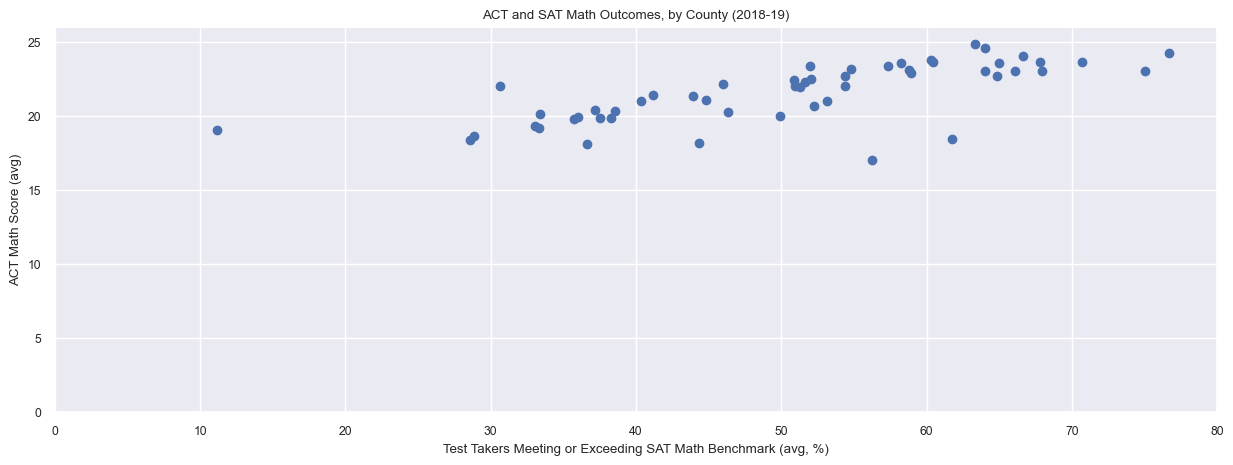

In [1223]:
math_outcomes_ca = Spending_and_ACT_and_SAT_results[["county","avgscrmath_mean_act","sat_Math_success_mean19"]]

plt.figure(figsize=(15,5))

plt.scatter(Spending_and_ACT_and_SAT_results["sat_Math_success_mean19"],Spending_and_ACT_and_SAT_results["avgscrmath_mean_act"])
plt.ylim(0,26)
plt.xlim(0,80)

plt.title("ACT and SAT Math Outcomes, by County (2018-19)")
plt.xlabel("Test Takers Meeting or Exceeding SAT Math Benchmark (avg, %)")
plt.ylabel("ACT Math Score (avg)");

2. There is a strong, positive relationship between SAT and ACT outcomes in math by county (with a correlation of 0.72). For most counties, this means that a county with a lower average ACT score among grade 12 students is likely to have a lower percentage of grade 12 students meet or exceed the SAT math benchmark.

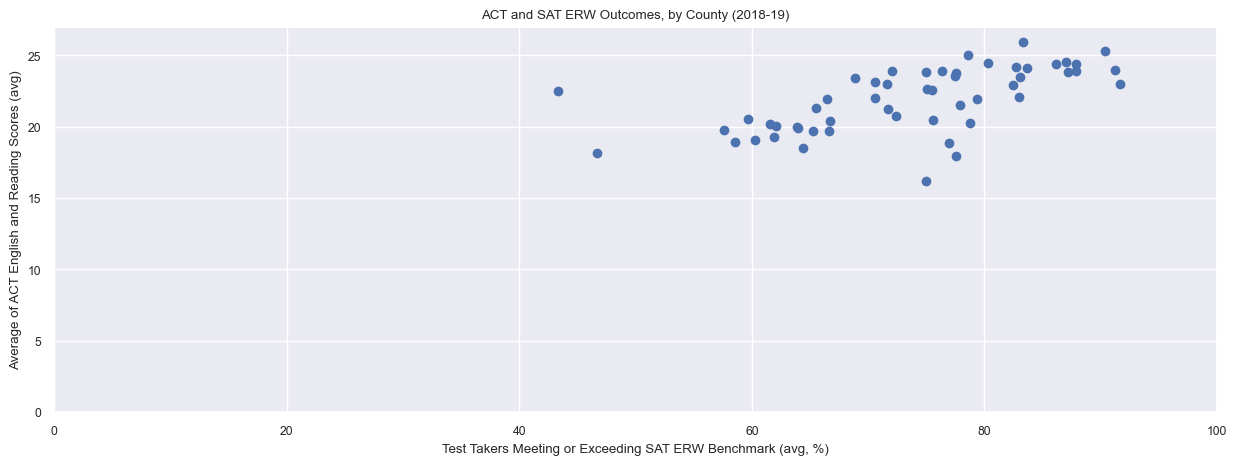

In [1225]:
Spending_and_ACT_and_SAT_results["act_ERW"] = Spending_and_ACT_and_SAT_results[["avgscreng_mean_act","avgscrread_mean_act"]].mean(axis=1)
math_outcomes_ca = Spending_and_ACT_and_SAT_results[["county","act_ERW","sat_ERW_success_mean19"]]
plt.figure(figsize=(15,5))
plt.scatter(Spending_and_ACT_and_SAT_results["sat_ERW_success_mean19"],Spending_and_ACT_and_SAT_results["act_ERW"])
plt.ylim(0,27)
plt.xlim(0,100)
plt.title("ACT and SAT ERW Outcomes, by County (2018-19)")
plt.xlabel("Test Takers Meeting or Exceeding SAT ERW Benchmark (avg, %)")
plt.ylabel("Average of ACT English and Reading Scores (avg)");

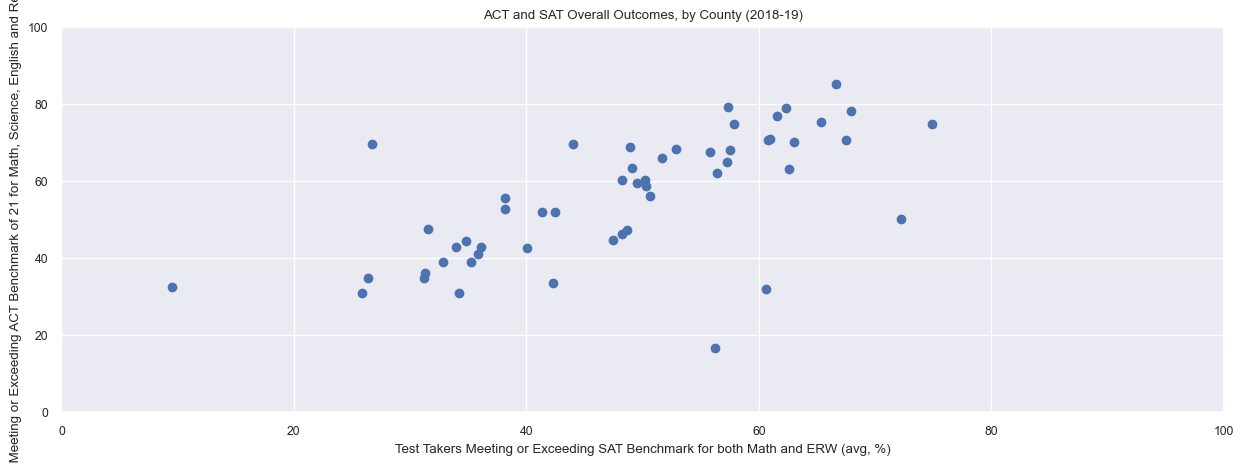

In [1228]:
math_outcomes_ca = Spending_and_ACT_and_SAT_results[["county","pctge21_act","sat_ERW_success_mean19"]]
plt.figure(figsize=(15,5))
plt.scatter(Spending_and_ACT_and_SAT_results["sat_Both_success_mean19"],Spending_and_ACT_and_SAT_results["pctge21_act"])
plt.ylim(0,100)
plt.xlim(0,100)
plt.title("ACT and SAT Overall Outcomes, by County (2018-19)")
plt.xlabel("Test Takers Meeting or Exceeding SAT Benchmark for both Math and ERW (avg, %)")
plt.ylabel("Test Takers Meeting or Exceeding ACT Benchmark of 21 for Math, Science, English and Reading (avg, %)");

3. There is a meaningful correlation between SAT and ACT outcomes (R=0.66).

In [1227]:
Spending_and_ACT_and_SAT_results["sat_Math_success_mean19"].corr(Spending_and_ACT_and_SAT_results["avgscrmath_mean_act"])

0.720979958310493

In [1226]:
Spending_and_ACT_and_SAT_results["sat_ERW_success_mean19"].corr(Spending_and_ACT_and_SAT_results["act_ERW"])

0.6195965267886545

In [1229]:
Spending_and_ACT_and_SAT_results["sat_Both_success_mean19"].corr(Spending_and_ACT_and_SAT_results["pctge21_act"])

0.6602900072576022

In [1119]:
Spending_and_ACT_and_SAT_results.round(2)

,county,agency_type_unified,total_spending_unified_sum,total_spending_unified_mean,agency_type,total_spending_high_sum,total_spending_high_mean,sat_enroll_sum19,sat_enroll_mean19,sat_test_taken_sum19,...,enroll12_sum_act,enroll12_mean_act,numtsttakr_act,numtsttakr_mean,act_participation_rate,avgscrmath_mean_act,avgscrsci_mean_act,avgscreng_mean_act,avgscrread_mean_act,pctge21_act
0,Alameda,Unified,229017.0,13471.59,NaN,NaN,NaN,49993.0,704.13,17701.0,...,49870.0,673.92,10864.0,146.81,26.63,23.35,22.93,23.18,23.65,63.23
2,Amador,Unified,9560.0,9560.00,NaN,NaN,NaN,845.0,211.25,159.0,...,845.0,211.25,111.0,27.75,14.19,23.00,22.25,23.00,24.00,78.97
3,Butte,Unified,59749.0,11949.80,High,14062.0,14062.00,7077.0,442.31,1620.0,...,7225.0,380.26,678.0,35.68,8.11,23.10,22.50,21.50,22.70,62.07
4,Calaveras,Unified,12071.0,12071.00,High,18370.0,18370.00,1178.0,235.60,256.0,...,1178.0,235.60,93.0,18.60,8.14,24.00,23.33,22.67,25.33,85.17
5,Colusa,Unified,47544.0,11886.00,NaN,NaN,NaN,714.0,142.80,174.0,...,904.0,129.14,78.0,11.14,8.72,19.00,19.33,17.33,19.00,32.37
6,Contra Costa,Unified,88240.0,12605.71,High,26485.0,13242.50,41748.0,907.57,16203.0,...,42271.0,768.56,9549.0,173.62,21.99,22.50,22.38,22.71,23.55,60.17
7,Del Norte,Unified,13174.0,13174.00,NaN,NaN,NaN,812.0,270.67,214.0,...,812.0,270.67,15.0,5.00,1.96,NaN,NaN,NaN,NaN,NaN
8,El Dorado,Unified,25408.0,12704.00,High,12341.0,12341.00,5855.0,731.88,1756.0,...,6390.0,491.54,1395.0,107.31,15.88,23.62,23.25,23.38,24.25,70.67
9,Fresno,Unified,237039.0,13168.83,High,12530.0,12530.00,39715.0,749.34,12104.0,...,40821.0,618.50,5415.0,82.05,16.85,19.29,19.51,18.46,19.71,34.74
10,Glenn,Unified,79761.0,15952.20,NaN,NaN,NaN,1257.0,179.57,258.0,...,1257.0,179.57,216.0,30.86,19.17,18.60,20.00,19.40,20.60,34.66


In [1128]:
Spending_and_ACT_and_SAT_results[["total_spending_unified_sum","total_spending_high_sum"]] = Spending_and_ACT_and_SAT_results[["total_spending_unified_sum","total_spending_high_sum"]].fillna(0)


In [1129]:
Spending_and_ACT_and_SAT_results["high_spend"]=Spending_and_ACT_and_SAT_results["total_spending_unified_sum"]+Spending_and_ACT_and_SAT_results["total_spending_high_sum"]

In [1130]:
Spending_and_ACT_and_SAT_results_normal = Spending_and_ACT_and_SAT_results[["high_spend","sat_Both_success_mean19","pctge21_act"]]

In [1131]:
for column in Spending_and_ACT_and_SAT_results_normal.columns:
    Spending_and_ACT_and_SAT_results_normal[column] = Spending_and_ACT_and_SAT_results_normal[column]/Spending_and_ACT_and_SAT_results_normal[column].abs().max()

/var/folders/r7/lck4_m6n3qvgvrpymc_hdq900000gn/T/ipykernel_33369/2483070549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spending_and_ACT_and_SAT_results_normal[column] = Spending_and_ACT_and_SAT_results_normal[column]/Spending_and_ACT_and_SAT_results_normal[column].abs().max()


In [1132]:
Spending_and_ACT_and_SAT_results_normal["county"] = Spending_and_ACT_and_SAT_results["county"]

/var/folders/r7/lck4_m6n3qvgvrpymc_hdq900000gn/T/ipykernel_33369/2325132617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spending_and_ACT_and_SAT_results_normal["county"] = Spending_and_ACT_and_SAT_results["county"]


In [1135]:
Spending_and_ACT_and_SAT_results_normal.sort_values("high_spend", ascending = False)

,high_spend,sat_Both_success_mean19,pctge21_act,county
18,1.000000,0.465183,0.520306,Los Angeles
34,0.449459,0.479140,0.481317,San Bernardino
31,0.402536,0.453058,0.501215,Riverside
35,0.395781,0.660742,0.697613,San Diego
9,0.361752,0.416622,0.407923,Fresno
0,0.331962,0.655228,0.742383,Alameda
26,0.297035,0.471110,0.457516,Monterey
28,0.272034,0.744640,0.792918,Orange
41,0.250459,0.814402,0.832956,Santa Clara
14,0.242423,0.482220,0.503142,Kern


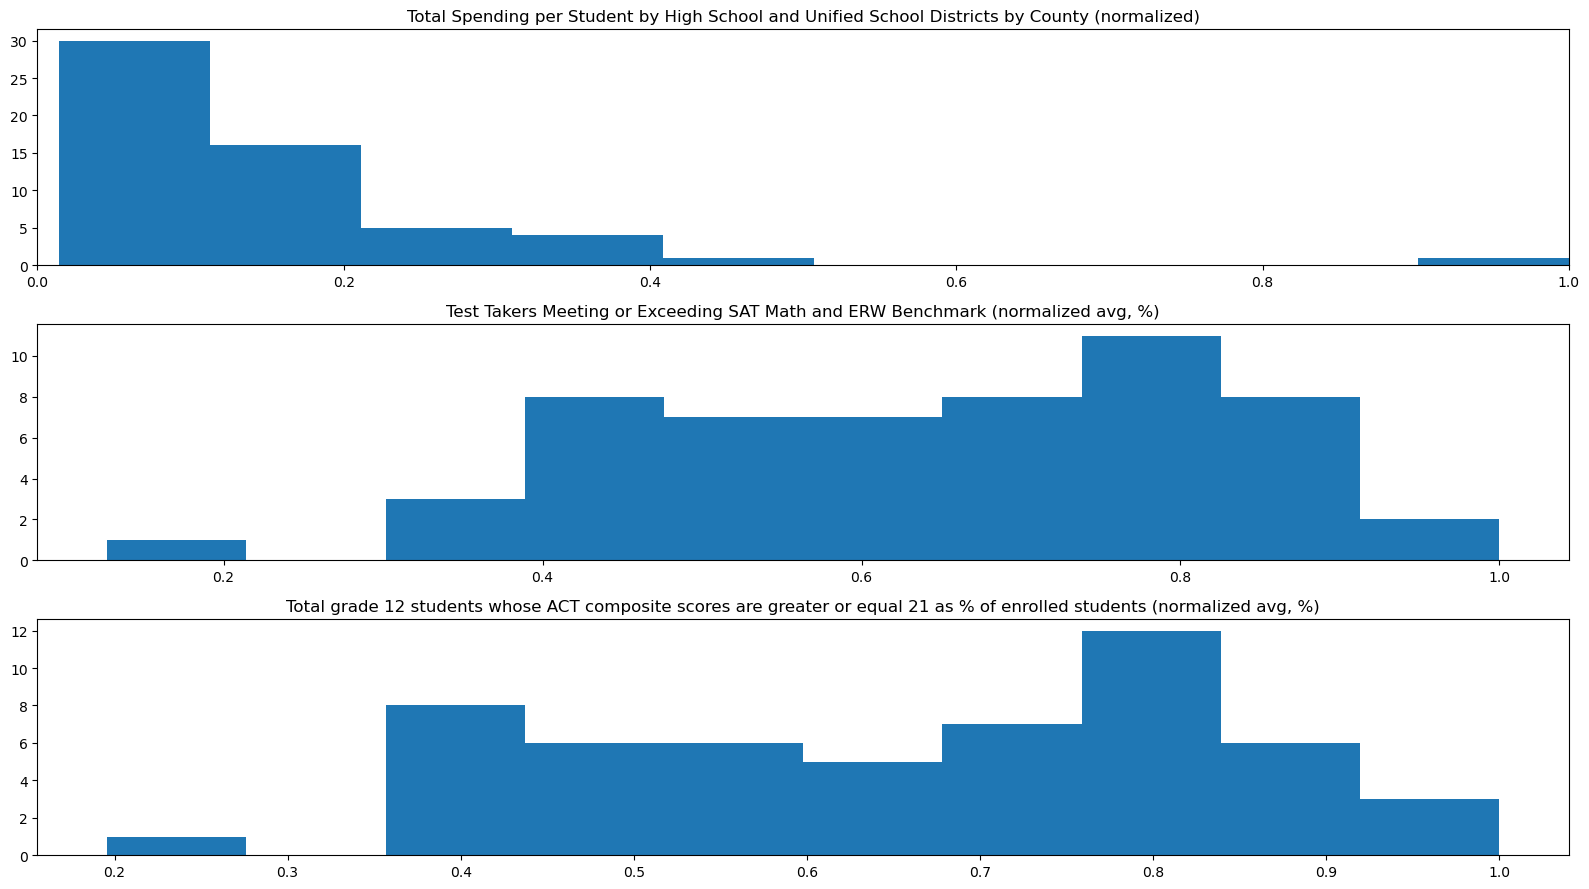

In [1137]:
plt.figure(figsize = (16,9))

ax1 = plt.subplot(3, 1, 1)
ax1.hist(Spending_and_ACT_and_SAT_results_normal["high_spend"])
ax1.set_title("Total Spending per Student by High School and Unified School Districts by County (normalized)")
ax1.set_xlim(0,1)

ax2 = plt.subplot(3, 1, 2)
ax2.hist(Spending_and_ACT_and_SAT_results_normal["sat_Both_success_mean19"])
ax2.set_title("Test Takers Meeting or Exceeding SAT Math and ERW Benchmark (normalized avg, %)")

ax3 = plt.subplot(3, 1, 3)
ax3.hist(Spending_and_ACT_and_SAT_results_normal["pctge21_act"])
ax3.set_title("Total grade 12 students whose ACT composite scores are greater or equal 21 as % of enrolled students (normalized avg, %)");

plt.tight_layout();

4. Los Angeles county has the highest spending per student, but does not stand out with ACT or SAT success relative to other counties. Factors such as geographic dispersion, number of students, representation of English Language Learners and minorities, all pose challenges to student success; emphasizing that resource allocation is just as important as budget allocation. 
<br>
Interestingly, we see spending/student as having a slightly negative correlation with:
- % of grade 12 students meeting or exceeding the SAT benchmark for both Math and ERW (-0.322)
- % of grade 12 students meeting or exceeding the ACT score of 21 (-0.174)

Important note: ACT and SAT outcomes for grade 12 students were positively correlated (0.66). It would be important to look at interventions for improving academic performance, and whether these impact ACT and SAT outcomes equally.

In [1018]:
#Disaggregated data analysis for SAT scores
col5 =SAT19_California["sat_participation_rate"] #SAT test takers as % of grade 12 students enrolled (2019) 
col6 =SAT19_California["pcterwbenchmark12"] #%(ERW)
col7 =SAT19_California["pctmathbenchmark12"] #%(Math)
col8 =SAT19_California["pctbothbenchmark12"] #%(Both)

In [981]:
col6.corr(col5) #corr between participation rate and results on ERW

-0.27319534450912586

In [982]:
col7.corr(col5) #corr between participation rate and results on Math

-0.16550958772070998

In [983]:
col8.corr(col5) #corr between participation rate and mean Both

-0.1717796582857962

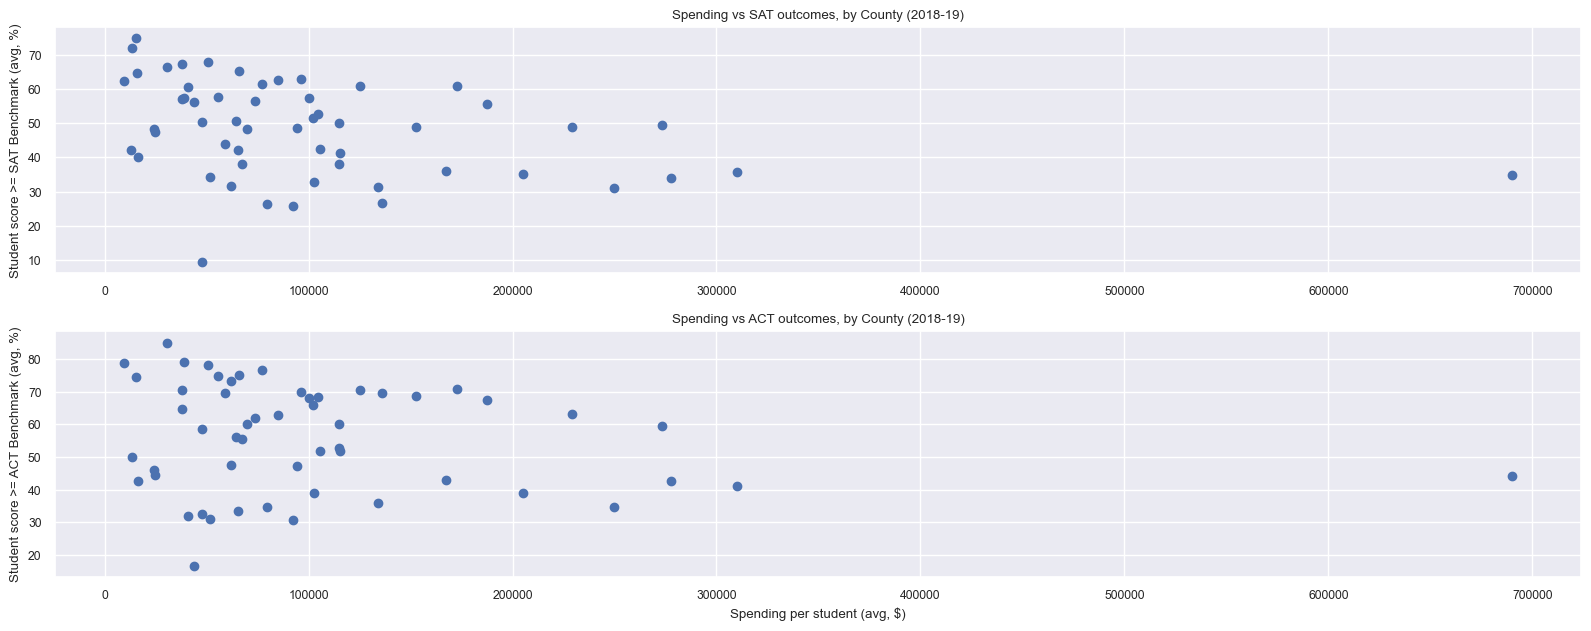

In [1249]:
plt.figure(figsize=(16,9))

ax1 = plt.subplot(3, 1, 1)
ax1.scatter(Spending_and_ACT_and_SAT_results["high_spend"],Spending_and_ACT_and_SAT_results["sat_Both_success_mean19"])
ax1.set_title("Spending vs SAT outcomes, by County (2018-19)")
ax1.set_ylabel("Student score >= SAT Benchmark (avg, %)")

ax2 = plt.subplot(3, 1, 2)
ax2.scatter(Spending_and_ACT_and_SAT_results["high_spend"],Spending_and_ACT_and_SAT_results["pctge21_act"])
ax2.set_title("Spending vs ACT outcomes, by County (2018-19)")
ax2.set_xlabel("Spending per student (avg, $)")
ax2.set_ylabel("Student score >= ACT Benchmark (avg, %)")


plt.tight_layout();

5. Spending has a weak negative relationship with educational outcomes.

In [1230]:
Spending_and_ACT_and_SAT_results["high_spend"].corr(Spending_and_ACT_and_SAT_results["sat_Both_success_mean19"])

-0.3220948563081005

In [1231]:
Spending_and_ACT_and_SAT_results["high_spend"].corr(Spending_and_ACT_and_SAT_results["pctge21_act"])

-0.17377988036336706

In [1168]:
Spending_and_ACT_and_SAT_results_correl.columns

Index(['total_spending_unified_sum', 'total_spending_unified_mean',
       'total_spending_high_sum', 'total_spending_high_mean',
       'sat_enroll_sum19', 'sat_enroll_mean19', 'sat_test_taken_sum19',
       'sat_test_taken_mean19', 'sat_participation_rate_mean19',
       'sat_ERW_success_mean19', 'sat_Math_success_mean19',
       'sat_Both_success_mean19', 'enroll12_sum_act', 'enroll12_mean_act',
       'numtsttakr_act', 'numtsttakr_mean', 'act_participation_rate',
       'avgscrmath_mean_act', 'avgscrsci_mean_act', 'avgscreng_mean_act',
       'avgscrread_mean_act', 'pctge21_act', 'High_Spend', 'high_spend'],
      dtype='object')

In [1184]:
Spending_and_ACT_and_SAT_results_correl= Spending_and_ACT_and_SAT_results.corr()
Spending_and_ACT_and_SAT_results_correl.drop(["High_Spend"], axis=1, inplace=True)
Spending_and_ACT_and_SAT_results_correl.drop("High_Spend", axis=0, inplace=True)

/var/folders/r7/lck4_m6n3qvgvrpymc_hdq900000gn/T/ipykernel_33369/1987518137.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Spending_and_ACT_and_SAT_results_correl= Spending_and_ACT_and_SAT_results.corr()


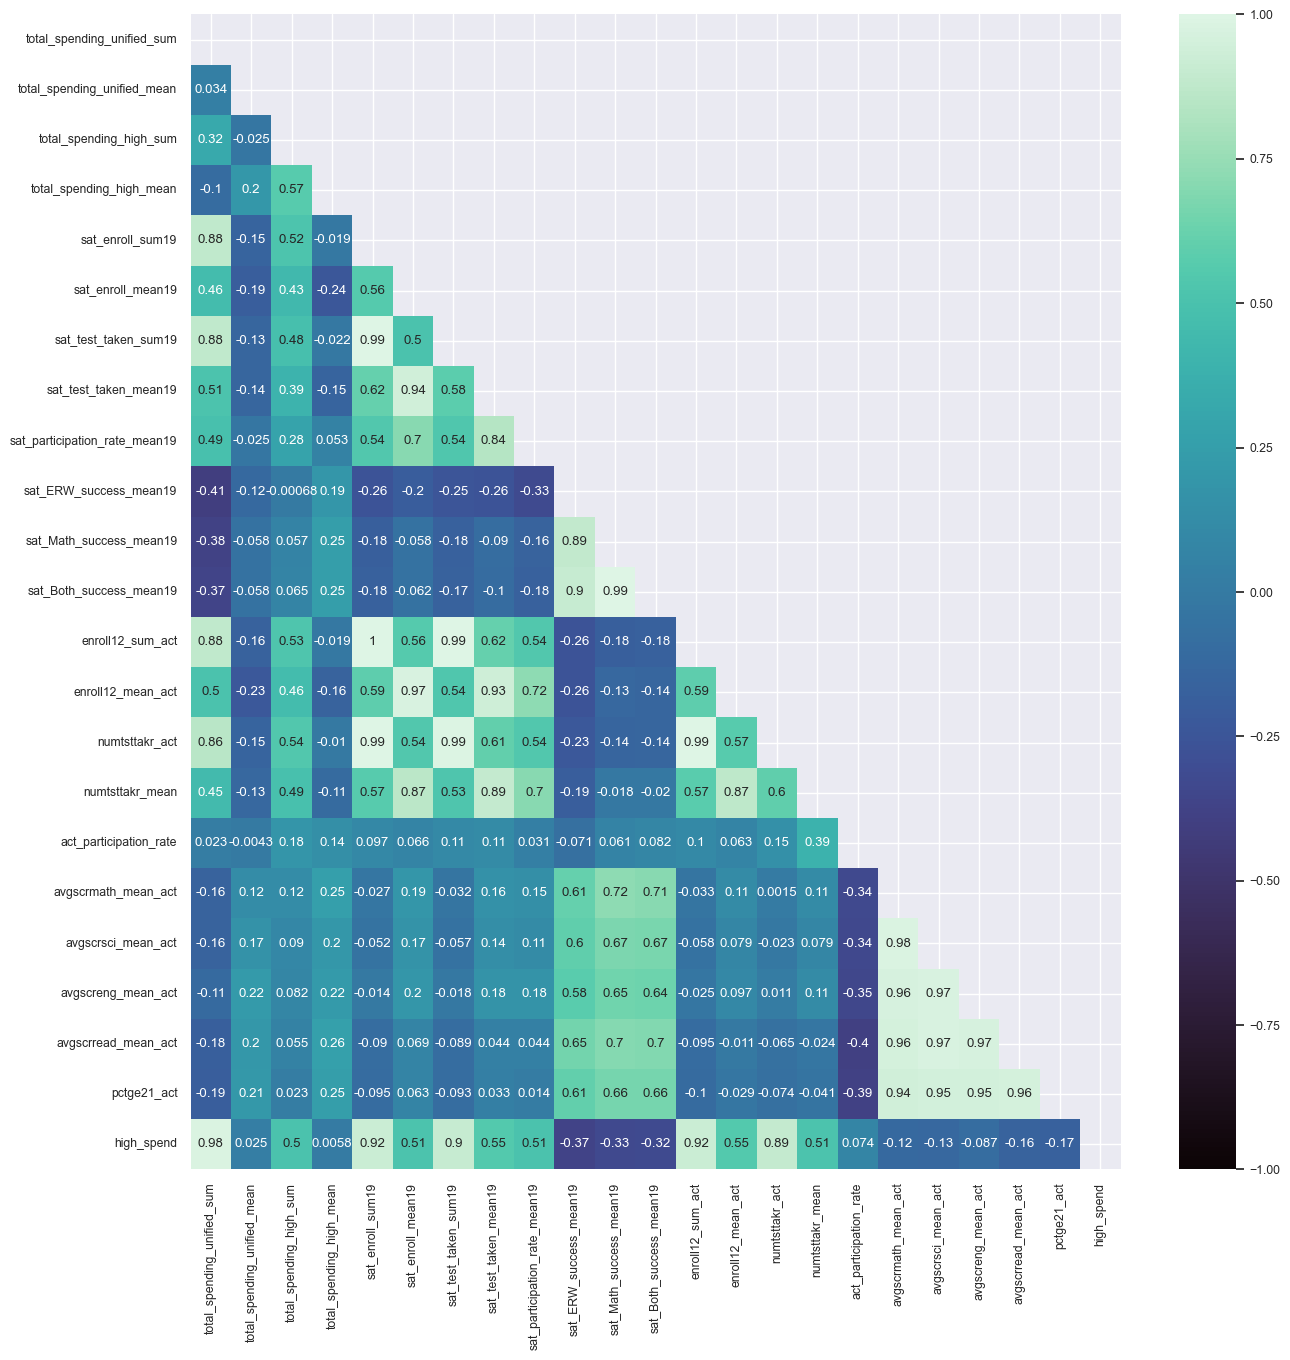

In [1189]:
plt.figure(figsize = (15,15))
mask = np.zeros_like(Spending_and_ACT_and_SAT_results_correl)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=0.8)
sns.heatmap(Spending_and_ACT_and_SAT_results_correl, annot=True, mask = mask, cmap = 'mako', vmax = 1, vmin=-1);

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

1. Just 43.4% of California students met or exceeded the SAT benchmark.
- While 56% of students met or exceeded the ACT benchmark, fewer students take the ACT
2. California students fare worse in Mathematics than English, Reading, or Writing
- SAT and ACT outcomes in mathematics were closely related, implying that interventions and variables impacting performance in mathematics, impacts test-takers for both tests 
3. Higher spending per pupil did not result in better educational outcomes

**Next Steps in the Analysis**
1. Confirm that SAT and ACT results:
- How well they reflect educational outcomes
- How they relate to acceptance and success criteria in post-secondary education
- How they compare to other factors that evaluate educational outcomes, especially with respect to accounting for geographic and economic dispersion, English proficiency, and diversity and representation
2. Review spending per student calculations to finalize outcomes
3. Consider conducting a cohort-based analysis, to see whether a continuous 4-year investment results in improved educational outcomes
4. Define and evaluate factors that impact resource allocation in education
5. Conduct time-series analysis to test factors identified as having a significant impact on resource allocation effectiveness for education outcomes
